# Scanpy Tutorial
BroadRATs Talk: 6/8/2022  
Written and given by Danielle Firer

Tutorial based off of the Scanpy tutorial: Preprocessing and clustering 3k PBMCs
https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html
with some variation

In [1]:
#begin by importing necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, figsize= (4,4), facecolor='white', fontsize=19)

In [3]:
adata = sc.read_10x_mtx('/mnt/disk2/filtered_gene_bc_matrices/hg19', var_names='gene_symbols', cache=True)

... reading from cache file cache/mnt-disk2-filtered_gene_bc_matrices-hg19-matrix.h5ad


In [4]:
print(adata)
print('\nadata.var')
display(adata.var)
print('\nadata.obs')
display(adata.obs)
print('\nadata.X')
display(adata.X)

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

adata.var


,gene_ids
MIR1302-10,ENSG00000243485
FAM138A,ENSG00000237613
OR4F5,ENSG00000186092
RP11-34P13.7,ENSG00000238009
RP11-34P13.8,ENSG00000239945
...,...
AC145205.1,ENSG00000215635
BAGE5,ENSG00000268590
CU459201.1,ENSG00000251180
AC002321.2,ENSG00000215616



adata.obs


""
AAACATACAACCAC-1
AAACATTGAGCTAC-1
AAACATTGATCAGC-1
AAACCGTGCTTCCG-1
AAACCGTGTATGCG-1
...
TTTCGAACTCTCAT-1
TTTCTACTGAGGCA-1
TTTCTACTTCCTCG-1
TTTGCATGAGAGGC-1



adata.X


<2700x32738 sparse matrix of type '<class 'numpy.float32'>'
	with 2286884 stored elements in Compressed Sparse Row format>

## Preprocessing

### Annotate whether genes are mitochondrial and calculate QC metrics for cells

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,2421.0,73.0,3.015283
AAACATTGAGCTAC-1,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,3149.0,28.0,0.889171
AAACCGTGCTTCCG-1,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,981.0,12.0,1.223242
...,...,...,...,...
TTTCGAACTCTCAT-1,1155,3461.0,73.0,2.109217
TTTCTACTGAGGCA-1,1227,3447.0,32.0,0.928343
TTTCTACTTCCTCG-1,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,1024.0,21.0,2.050781


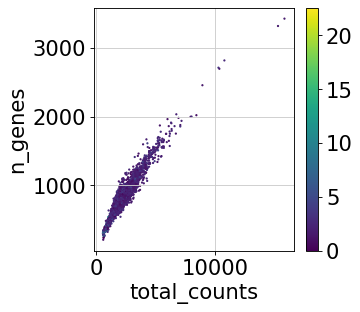

In [6]:
plt.scatter(adata.obs.total_counts, adata.obs.n_genes_by_counts, cmap='viridis' ,c=adata.obs['pct_counts_mt'],s=1)
plt.ylabel('n_genes')
plt.xlabel('total_counts')
plt.colorbar()

10X is only showing us their perfect datasets... 
More realistic plot of # counts vs # genes
![example_counts_vs_genes](example_counts_vs_genes.png)


A violin plot of some of the computed quality measures:

* the number of genes expressed in the count matrix
* the total counts per cell
* the percentage of counts in mitochondrial genes

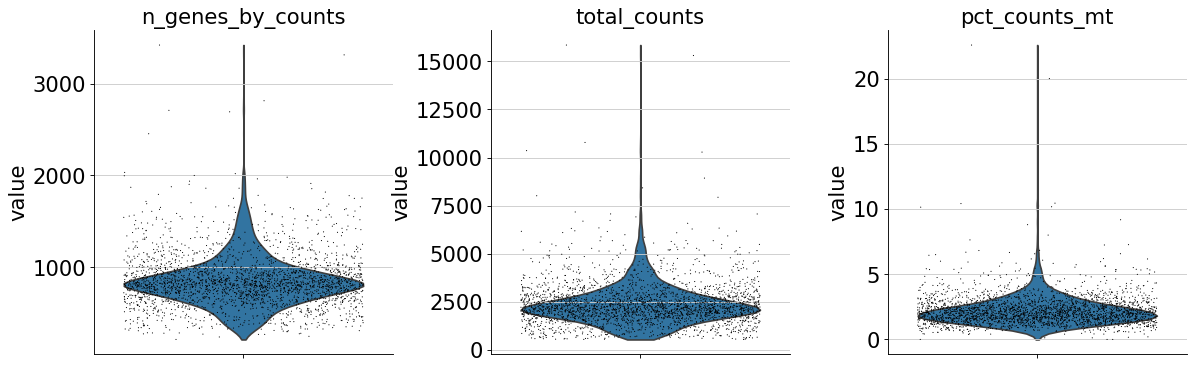

In [7]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

Incorporating scanpy plots into subplots

/home/dfirer/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


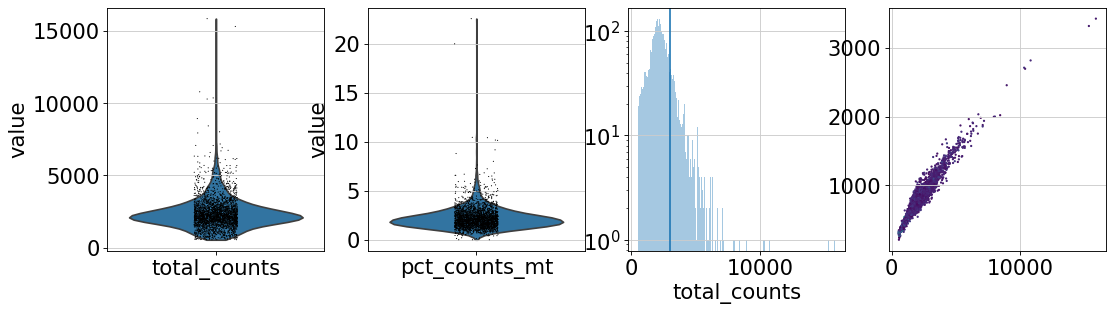

In [8]:
fig, axes = plt.subplots(1,4,figsize=(16,4))
t1 = sc.pl.violin(adata, 'total_counts', groupby=None, cut=0, ax=axes[0], show=False) #log=True,
t2 = sc.pl.violin(adata, 'pct_counts_mt', groupby=None, ax=axes[1], show=False)
sns.distplot(adata.obs['total_counts'], kde=False, bins=200, ax=axes[2])
axes[2].axvline(3000)
axes[2].set_yscale('log')
axes[3]= plt.scatter(adata.obs.total_counts, adata.obs.n_genes_by_counts, cmap='viridis' ,c=adata.obs['pct_counts_mt'],s=1)
plt.show()

### Basic filtering 

filter based on the number of genes found in a cell and the number of cells genes are found in

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


Mitochondrial filtering by slicing the AnnData object

If you were running doublet detection tools like scrublet, you would run them before removing cells based on mitochondrial QC metrics

In [10]:
adata = adata[adata.obs.pct_counts_mt < 5, :] # 5% is very low, often times will use a higher cutoff ~10-20% but this depends on data quality
adata

View of AnnData object with n_obs × n_vars = 2643 × 13714
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

### Total-count normalize, logarithmize, identify highly-variable genes and scale the data

In [11]:
adata.layers['counts']= adata.X.copy() #save a copy of the raw counts in a layer
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata.copy() #save the log-norm counts before scaling

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.scale(adata, max_value=10)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


## PCA, computing the neighborhood graph, and clustering

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


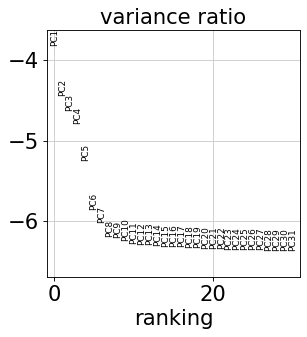

In [12]:
sc.pp.pca(adata, svd_solver='arpack', use_highly_variable=True)
sc.pl.pca_variance_ratio(adata, log=True)

What we see above is the elbow plot: we need to choose how many PCs to use

* the general rule is you want to include anything to the left of the elbow
* usually choose a PC the is just after the elbow
* if you choose too many PCs your UMAP will have too many very tiny clusters where you can't see any informative separation

An example of a UMAP after choosing too many PCs:  
![example_too_many_pcs](too_many_pcs.png)

In [13]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=8)

computing neighbors
    using 'X_pca' with n_pcs = 8
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:27)


In [14]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


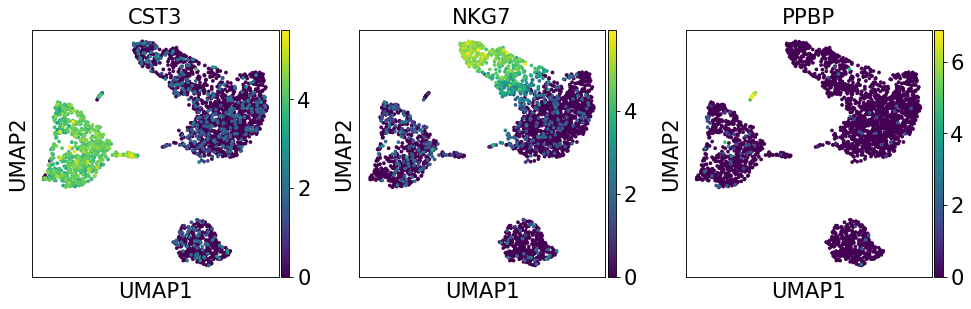

In [15]:
sc.pl.umap(adata, color=['CST3', 'NKG7', 'PPBP'])

In [16]:
sc.tl.louvain(adata, resolution=.6) #lower resolution -> less clusters

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


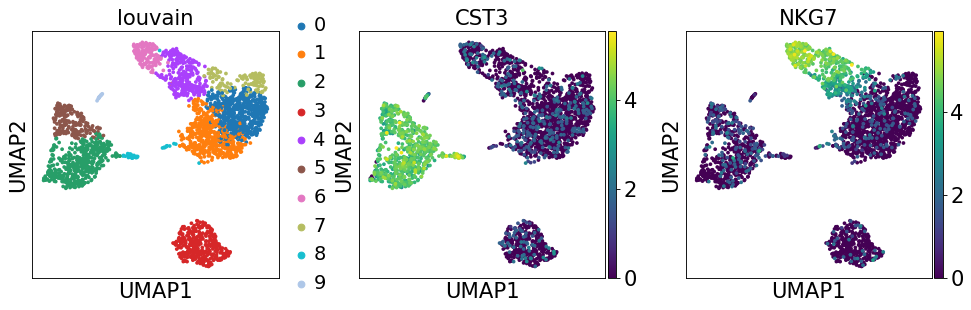

In [17]:
sc.pl.umap(adata, color=['louvain', 'CST3', 'NKG7'])

### changing UMAP colors

In [18]:
adata

AnnData object with n_obs × n_vars = 2643 × 13714
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'louvain'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'louvain', 'louvain_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [19]:
adata.uns['louvain_colors']

['#1f77b4',
 '#ff7f0e',
 '#279e68',
 '#d62728',
 '#aa40fc',
 '#8c564b',
 '#e377c2',
 '#b5bd61',
 '#17becf',
 '#aec7e8']

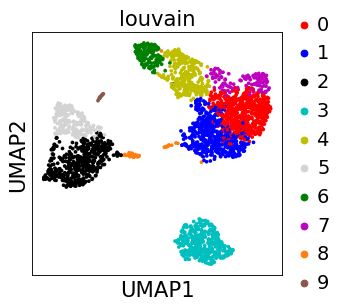

In [20]:
adata.uns['louvain_colors']= ['r','b','k','c','y','lightgrey','g','m','tab:orange','tab:brown']
sc.pl.umap(adata, color=['louvain'])

### Finding marker genes

Find marker genes that separate each louvain cluster vs the rest of the cells

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


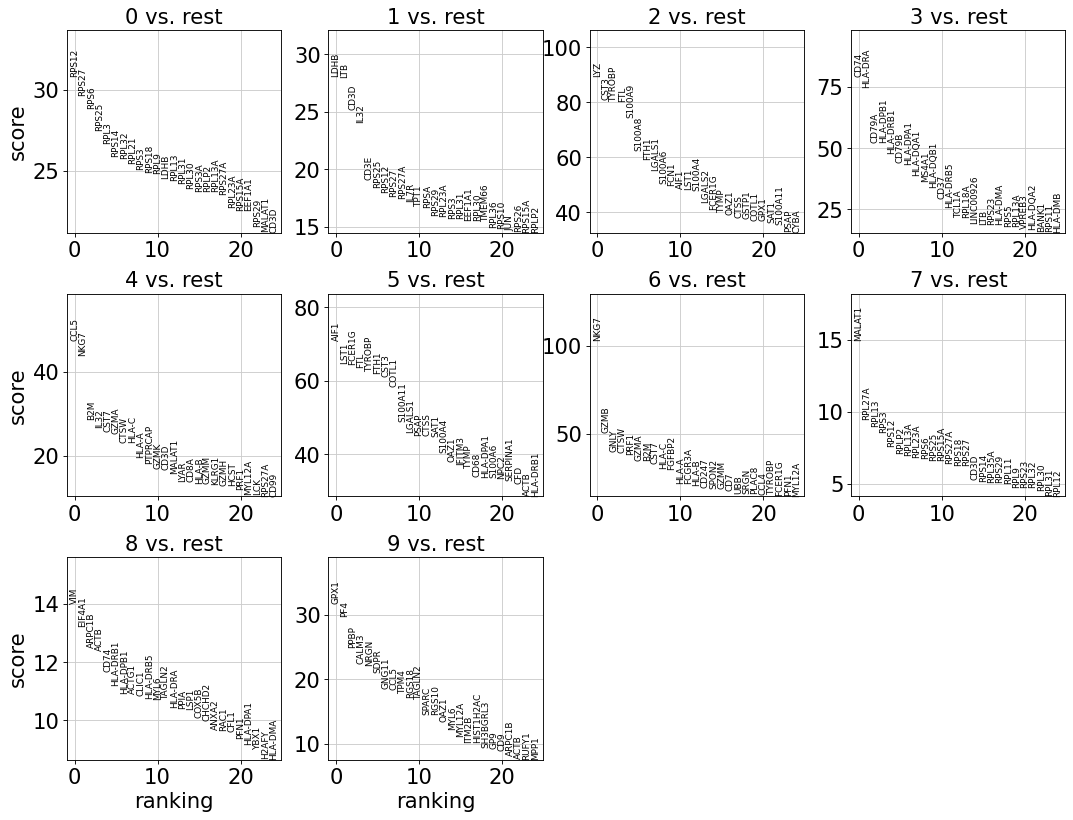

In [21]:
sc.tl.rank_genes_groups(adata, 'louvain', method='t-test')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [22]:
adata.uns['rank_genes_groups']

{'params': {'groupby': 'louvain',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('RPS12', 'LDHB', 'LYZ', 'CD74', 'CCL5', 'AIF1', 'NKG7', 'MALAT1', 'VIM', 'GPX1'),
            ('RPS27', 'LTB', 'CST3', 'HLA-DRA', 'NKG7', 'LST1', 'GZMB', 'RPL27A', 'EIF4A1', 'PF4'),
            ('RPS6', 'CD3D', 'TYROBP', 'CD79A', 'B2M', 'FCER1G', 'GNLY', 'RPL13', 'ARPC1B', 'PPBP'),
            ...,
            ('HLA-DRA', 'HLA-DRB1', 'IL32', 'IL32', 'LGALS2', 'IL32', 'LY86', 'IFI30', 'DPEP2', 'EVL'),
            ('HLA-DRB5', 'HLA-DRA', 'MALAT1', 'S100A4', 'AIF1', 'PTPRCAP', 'SPINT2', 'SPI1', 'CDA', 'EIF3L'),
            ('HLA-DRB1', 'TYROBP', 'PTPRCAP', 'CD3D', 'S100A8', 'CD3D', 'IFI30', 'HLA-DQB1', 'PIK3IP1', 'ZFP36L2')],
           dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O'), ('8', 'O'), ('9', 'O')]),
 'scores': rec.array([( 30.780617,  28.01115 ,  89.1

Compare a cluster vs another cluster rather than all other cells:

example: have two tumor clusters and want to see why there is separation between the two of them

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


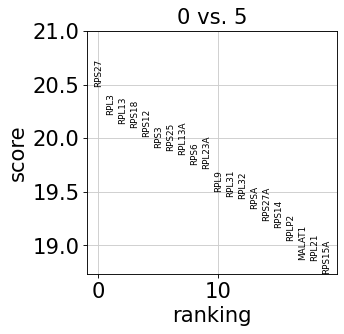

In [23]:
sc.tl.rank_genes_groups(adata, 'louvain', groups=['0'], reference='5', method='wilcoxon')
sc.pl.rank_genes_groups(adata, groups=['0'], n_genes=20)

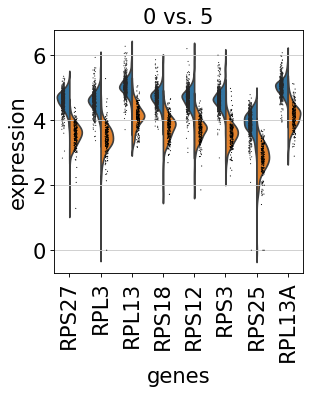

In [24]:
#more detailed view for a certain group
sc.pl.rank_genes_groups_violin(adata, groups='0', n_genes=8)

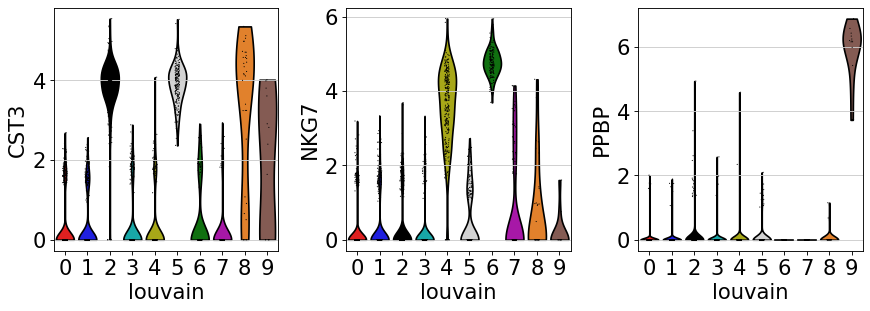

In [25]:
sc.pl.violin(adata, ['CST3', 'NKG7', 'PPBP'], groupby='louvain')

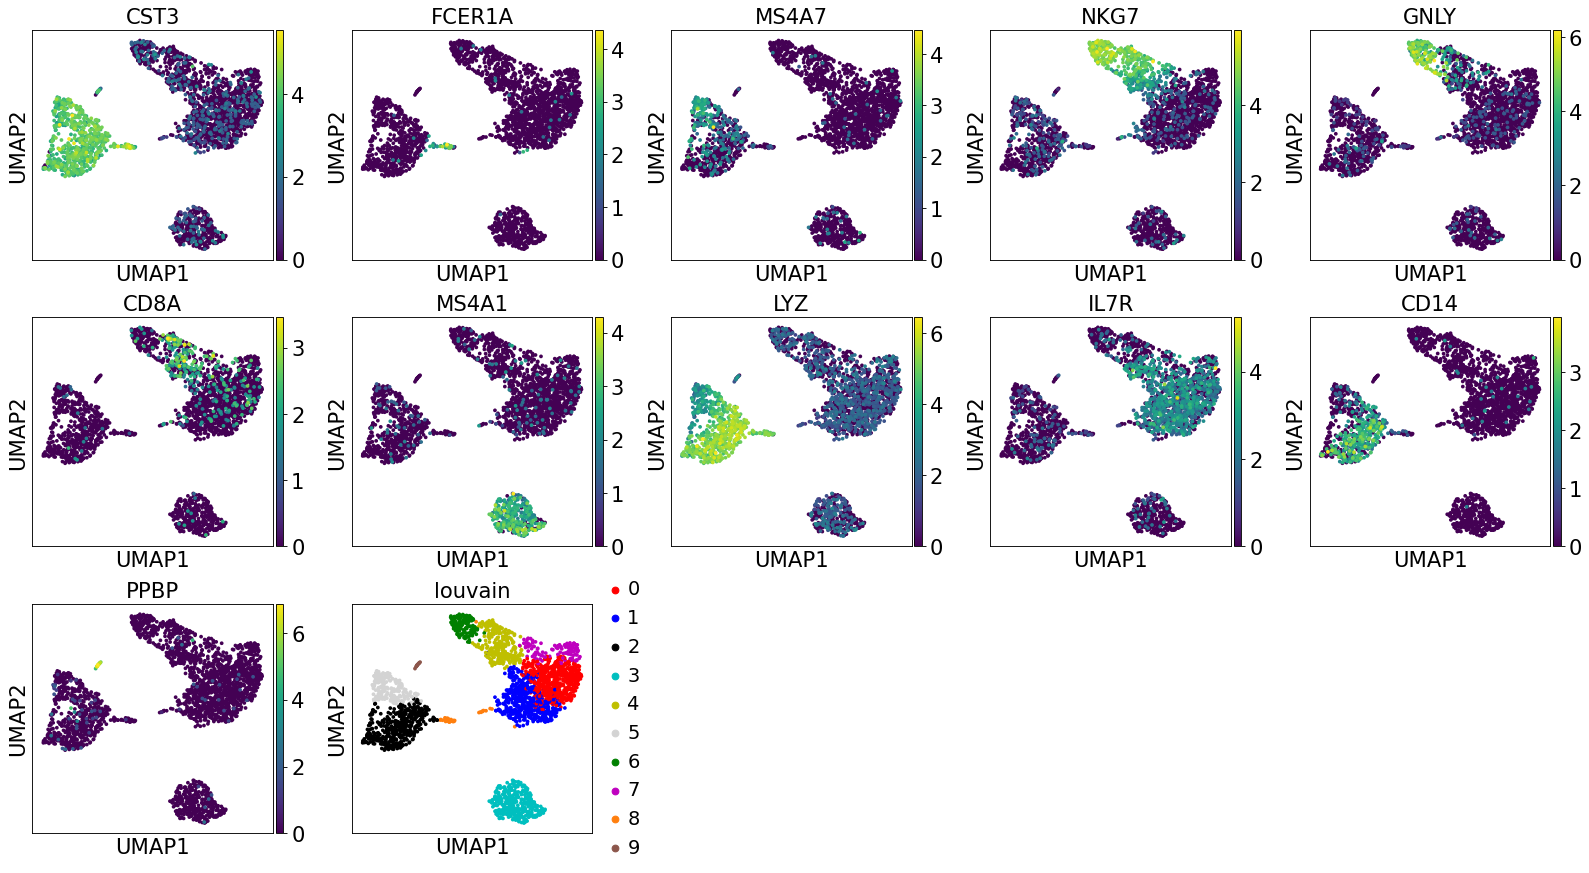

In [26]:
sc.pl.umap(adata, color= ['CST3', 'FCER1A','MS4A7','NKG7','GNLY','CD8A','MS4A1','LYZ', 'IL7R', 'CD14','PPBP','louvain'], ncols=5)

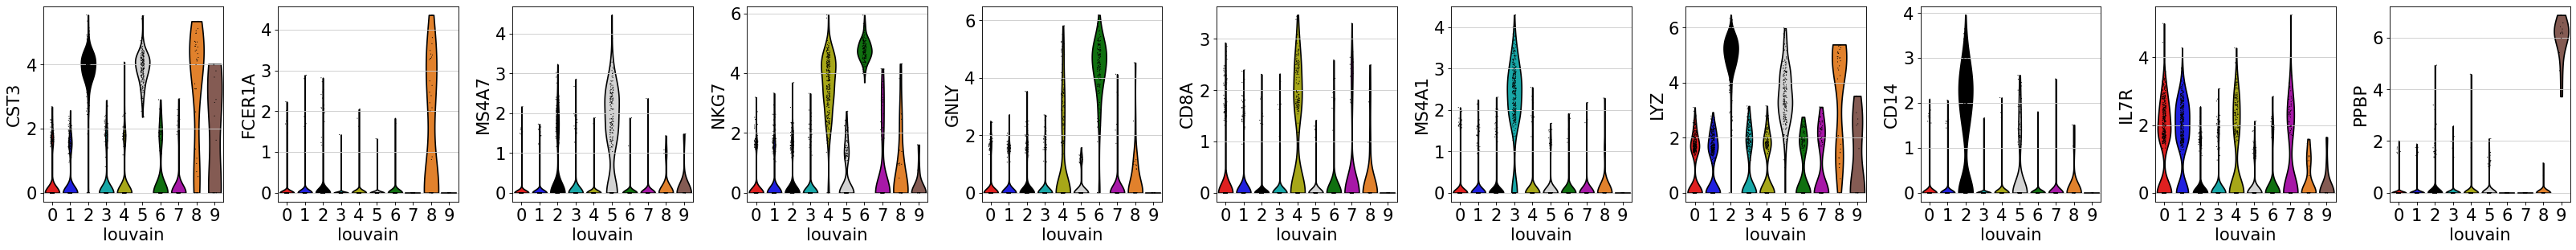

In [27]:
sc.pl.violin(adata, ['CST3', 'FCER1A','MS4A7','NKG7','GNLY','CD8A','MS4A1','LYZ', 'CD14','IL7R','PPBP'], groupby='louvain')

                                                            Based on expression patterns:

| Louvain Group | Markers     | Cell Type
| ------------- | ----------- | ----------- 
| 0             | IL7R       | CD4 T cells
| 1             | IL7R       | CD4 T cells
| 2             | CD14, LYZ        | CD14+ Monocytes
| 3             | MS4A1   | B cells
| 4             | CD8A | CD8 T cells
| 5             | FCGR3A, MS4A7 | FCGR3A+ Monocytes
| 6             | GNLY, NKG7 | NK cells
| 7             | IL7R       | CD4 T cells
| 8             | FCER1A, CST3 | Dendritic Cells
| 9             | PPBP | Megakaryocytes



In [28]:
cell_type_annotations = {'CD4 T': [0,1,7], 'CD14 Monocytes': [2], 'B': [3], 'CD8 T': [4], 'NK': [6], 'FCGR3A Monocytes': [5], 'Dendritic': [8], 'Megakaryocytes': [9]}

cluster_annotations = {}
for k,v in cell_type_annotations.items():
    for clus in v:
        cluster_annotations[clus]= k
cluster_annotations

{0: 'CD4 T',
 1: 'CD4 T',
 7: 'CD4 T',
 2: 'CD14 Monocytes',
 3: 'B',
 4: 'CD8 T',
 6: 'NK',
 5: 'FCGR3A Monocytes',
 8: 'Dendritic',
 9: 'Megakaryocytes'}

In [29]:
set(adata.obs.louvain)

{'0', '1', '2', '3', '4', '5', '6', '7', '8', '9'}

In [30]:
adata.obs

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes,louvain
AAACATACAACCAC-1,781,2421.0,73.0,3.015283,781,0
AAACATTGAGCTAC-1,1352,4903.0,186.0,3.793596,1352,3
AAACATTGATCAGC-1,1131,3149.0,28.0,0.889171,1131,1
AAACCGTGCTTCCG-1,960,2639.0,46.0,1.743085,960,5
AAACCGTGTATGCG-1,522,981.0,12.0,1.223242,522,6
...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,3461.0,73.0,2.109217,1155,2
TTTCTACTGAGGCA-1,1227,3447.0,32.0,0.928343,1227,3
TTTCTACTTCCTCG-1,622,1684.0,37.0,2.197150,622,3
TTTGCATGAGAGGC-1,454,1024.0,21.0,2.050781,454,3


In [31]:
adata.obs['cell_type']= adata.obs.louvain.apply(lambda x: cluster_annotations[int(x)])
adata.obs['cell_type']

AAACATACAACCAC-1               CD4 T
AAACATTGAGCTAC-1                   B
AAACATTGATCAGC-1               CD4 T
AAACCGTGCTTCCG-1    FCGR3A Monocytes
AAACCGTGTATGCG-1                  NK
                          ...       
TTTCGAACTCTCAT-1      CD14 Monocytes
TTTCTACTGAGGCA-1                   B
TTTCTACTTCCTCG-1                   B
TTTGCATGAGAGGC-1                   B
TTTGCATGCCTCAC-1               CD4 T
Name: cell_type, Length: 2643, dtype: object

... storing 'cell_type' as categorical


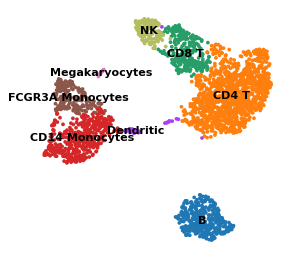

In [32]:
sc.pl.umap(adata, color='cell_type', legend_loc='on data', title='', frameon=False, legend_fontsize=10)


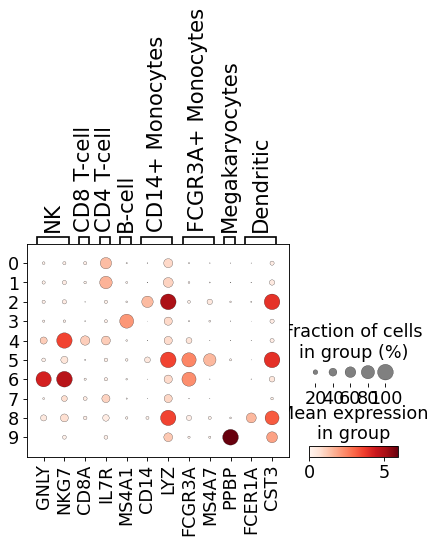

In [33]:
marker_genes = {     'NK': ['GNLY', 'NKG7'],
                     'CD8 T-cell': ['CD8A'],
                     'CD4 T-cell': ['IL7R'],
                     'B-cell': ['MS4A1'],
                     'CD14+ Monocytes': ['CD14', 'LYZ'],
                     'FCGR3A+ Monocytes': ['FCGR3A','MS4A7'],
                     'Megakaryocytes': ['PPBP'],
                     'Dendritic': ['FCER1A','CST3']}

sc.pl.dotplot(adata, marker_genes, groupby='louvain')

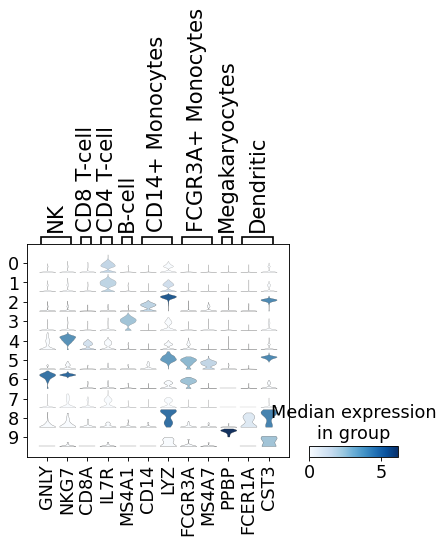

In [34]:
sc.pl.stacked_violin(adata, marker_genes, groupby='louvain', rotation=90)

## Write the anndata object to a h5 file so that you can save, reload your progress and keep working later

In [35]:
adata.write_h5ad('scanpy_tutorial.h5ad')

## if you need to grab the normalized counts and convert them to a dataframe

In [ ]:
log_norm_counts= pd.DataFrame.sparse.from_spmatrix(adata.raw.X)
log_norm_counts.columns= list(adata.var_names)
log_norm_counts.index= list(adata.obs_names)